<a href="https://colab.research.google.com/github/tackulus/204383/blob/main/Code09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **09 Lowpass & Highpass Filtering**

> **204383 Image Processing** 

---

> **Tocktack | Kasidis Torcharoen (610510531)** \\
**Top | Kittisak Thammawong (610510611)**

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [2]:
# Read an image
img = cv.imread('0901.jpg')
channels = img.shape[2]

In [3]:
# Fourier Transformation
fft_img = np.zeros_like(img, dtype=complex)
for ch in range(channels):
    fft_img[..., ch] = np.fft.fftshift(np.fft.fft2(img[..., ch]))

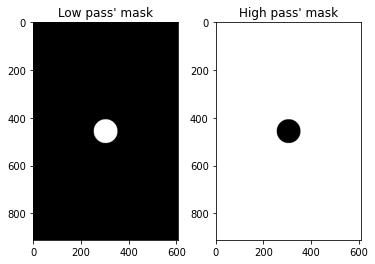

In [4]:
# Create masks

def draw_circle(shape, D):
    TF = np.zeros(shape, dtype=np.bool)
    c = np.array(shape) / 2.0
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            TF[y,x] = np.square(y-c[0]) + np.square(x-c[1]) < np.square(D) 
    return TF

low_mask   = draw_circle(img.shape[:2], D=50)
high_mask  = ~low_mask

fig = plt.figure()
ax  = fig.add_subplot(1,2,1)
ax.imshow(low_mask, cmap='gray')
ax.set_title("Low pass' mask")

ax  = fig.add_subplot(1,2,2)
ax.imshow(high_mask, cmap='gray')
ax.set_title("High pass' mask")

plt.show()

In [5]:
# Filtering
def filter_circle(mask, fft_img_ch):
    temp = np.zeros(img.shape[:2], dtype=complex)
    temp[mask] = fft_img_ch[mask]
    return temp

fft_img_low = []
fft_img_high = []
for ch in range(channels):
    fft_img_ch = fft_img[..., ch]

    temp = filter_circle(low_mask, fft_img_ch)
    fft_img_low.append(temp)
    
    temp = filter_circle(high_mask, fft_img_ch)
    fft_img_high.append(temp) 
    
fft_img_low = np.array(fft_img_low)
fft_img_low = np.transpose(fft_img_low, (1,2,0))

fft_img_high = np.array(fft_img_high)
fft_img_high = np.transpose(fft_img_high, (1,2,0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


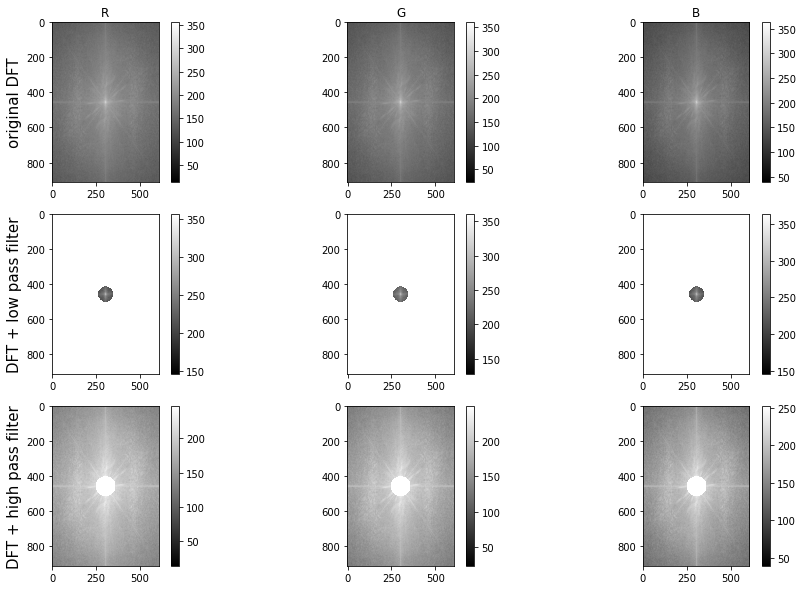

In [6]:
# Visualization in Frequency Domain
def imshow_fft(fft):
    magnitude_spectrum = 20 * np.log(np.abs(fft))
    return ax.imshow(magnitude_spectrum, cmap="gray")

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(15,10))
fontsize = 15 
for ch, color in enumerate(["R","G","B"]):
    ax = axs[0, ch]
    ax.set_title(color)
    im = imshow_fft(fft_img[..., ch])
    if ch == 0:
        ax.set_ylabel("original DFT",fontsize=fontsize)
    fig.colorbar(im, ax=ax)
    
    ax = axs[1, ch]
    im = imshow_fft(fft_img_low[..., ch])
    if ch == 0:
        ax.set_ylabel("DFT + low pass filter",fontsize=fontsize)
    fig.colorbar(im, ax=ax)
    
    ax = axs[2, ch]
    im = imshow_fft(fft_img_high[..., ch])
    if ch == 0:
        ax.set_ylabel("DFT + high pass filter",fontsize=fontsize)   
    fig.colorbar(im, ax=ax)
    
plt.show()

In [7]:
# Inverse Fourier Transformation
def inv_FFT_all_channel(fft):
    img_reco = []
    for ch in range(channels):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft[..., ch])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return img_reco

img_reco      = inv_FFT_all_channel(fft_img)
img_reco_low  = inv_FFT_all_channel(fft_img_low)
img_reco_high = inv_FFT_all_channel(fft_img_high)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


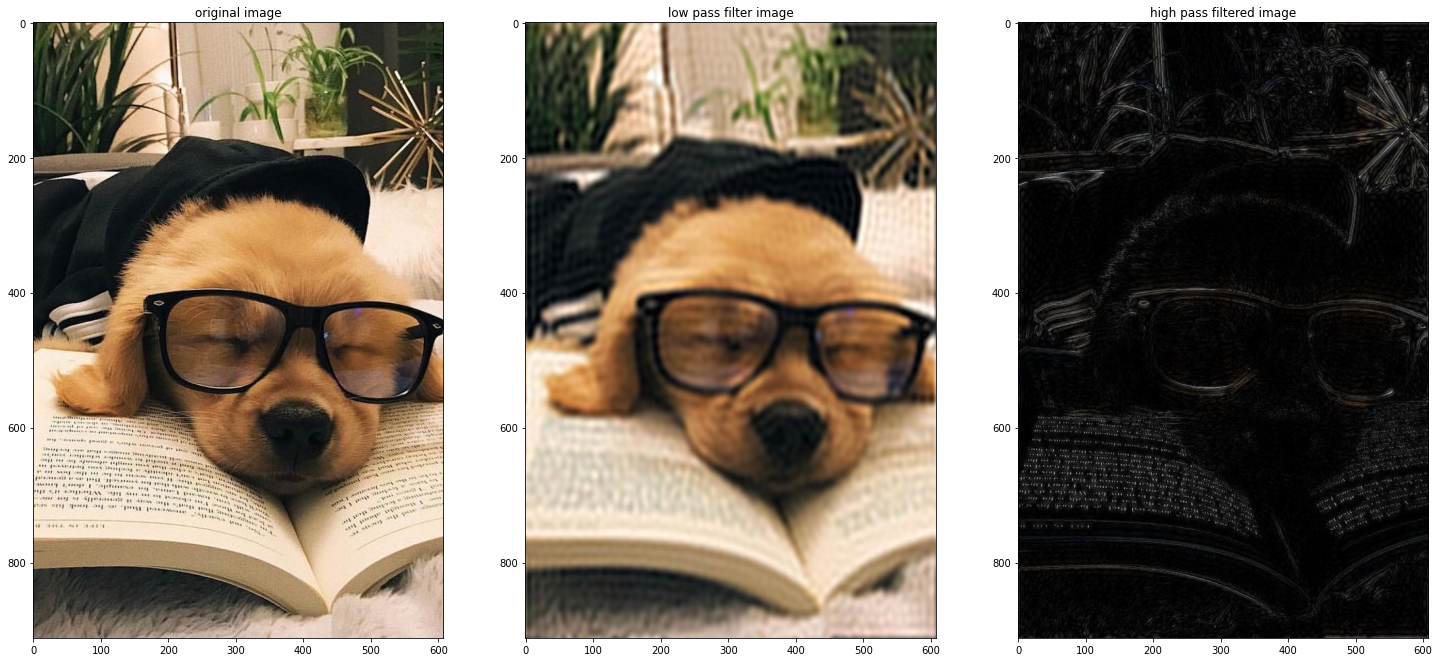

In [8]:
# Output
fig = plt.figure(figsize=(25,18))

ax  = fig.add_subplot(1,3,1)
result = np.abs(img_reco).astype(int)
result = result[..., (2,1,0)]
ax.imshow(np.abs(result).astype(int))
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
result = np.abs(img_reco_low).astype(int)
result = result[..., (2,1,0)]
ax.imshow(np.abs(result).astype(int))
ax.set_title("low pass filter image")

ax  = fig.add_subplot(1,3,3)
result = np.abs(img_reco_high).astype(int)
result = result[..., (2,1,0)]
ax.imshow(np.abs(result).astype(int))
ax.set_title("high pass filtered image")
plt.show()